In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img = cv2.imread('beach-438500_1280.jpg',0)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])


In [9]:
hist.size

256

In [10]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

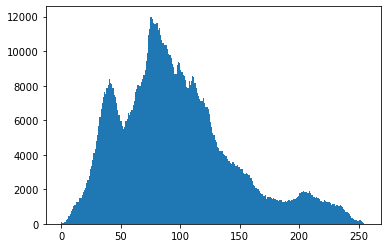

In [11]:
img = cv2.imread('beach-438500_1280.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

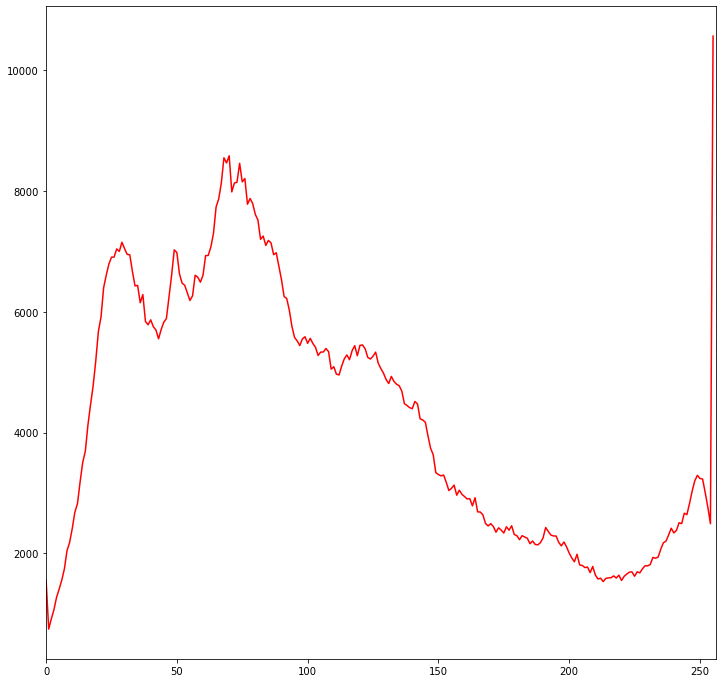

In [12]:
img = cv2.imread('beach-438500_1280.jpg')
color = ('b','g','r')
plt.figure(figsize=(12,12))
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
plt.plot(histr,color = col)
plt.xlim([0,256])
plt.show()

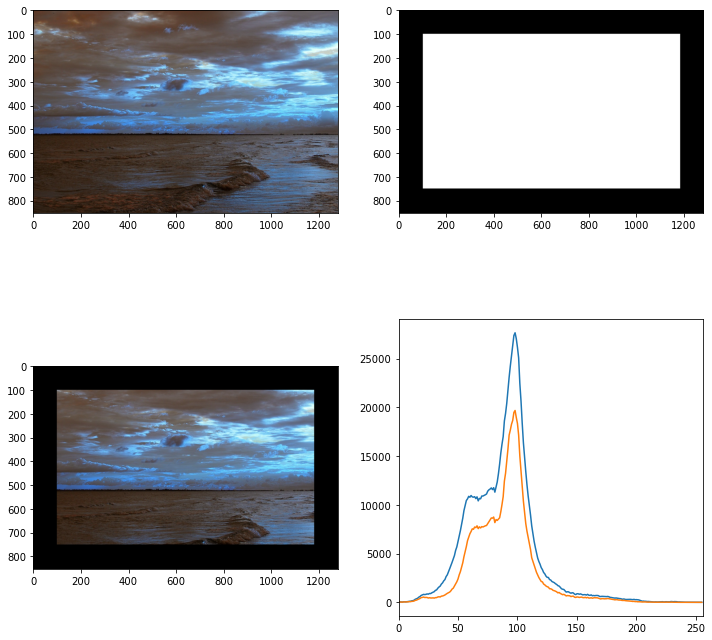

In [13]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:750, 100:1180] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,12))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

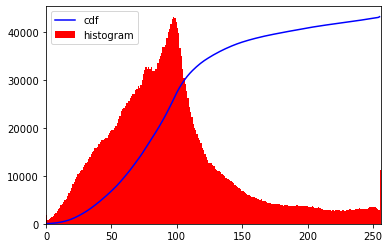

In [14]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [15]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
img2 = cdf[img]

(<matplotlib.axes._subplots.AxesSubplot at 0x2b7e58f5520>,
 <matplotlib.image.AxesImage at 0x2b7e6ccb520>)

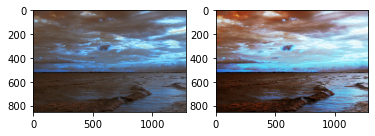

In [17]:
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2,'gray')

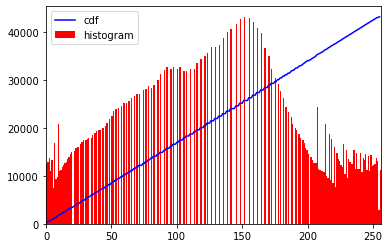

In [18]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()